In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2 as cv

In [5]:
#create a dataframe
labels_train = []
images_train = []

path_train = "D:\Coding\DataScience\DataPlayground\FruitRecognition\data\\train"
dir_list_train = os.listdir(path_train)

for lab in dir_list_train:
    #temp image list for each label
    img_list = os.listdir(path_train + "\\" + lab)
    for img in img_list:
        labels_train.append(lab)
        images_train.append(path_train + "\\" + lab + "\\" + img)

df_train = pd.DataFrame({"label":labels_train, "image":images_train})
#set each label a number
label_nums = dict(enumerate(df_train["label"].unique()))
#swap keys and values
label_nums = {value:key for key, value in label_nums.items()}

#map the label to the number
df_train["label"] = df_train["label"].map(label_nums)

#shuffle the dataframe
df_train = df_train.sample(frac=1).reset_index(drop=True)
df_train


,label,image
0,19,D:\Coding\DataScience\DataPlayground\FruitReco...
1,25,D:\Coding\DataScience\DataPlayground\FruitReco...
2,16,D:\Coding\DataScience\DataPlayground\FruitReco...
3,12,D:\Coding\DataScience\DataPlayground\FruitReco...
4,9,D:\Coding\DataScience\DataPlayground\FruitReco...
...,...,...
16849,22,D:\Coding\DataScience\DataPlayground\FruitReco...
16850,18,D:\Coding\DataScience\DataPlayground\FruitReco...
16851,30,D:\Coding\DataScience\DataPlayground\FruitReco...
16852,5,D:\Coding\DataScience\DataPlayground\FruitReco...


In [5]:

images_test = []

path_test = "D:\Coding\DataScience\DataPlayground\FruitRecognition\data\\test"
dir_list_test = os.listdir(path_test)
img_list = os.listdir(path_test)
for img in img_list:
    images_test.append(path_test + "\\" + img)

df_test = pd.DataFrame({"image":images_test})

#shuffle the dataframe
df_test = df_test.sample(frac=1).reset_index(drop=True)

df_test


,image
0,D:\Coding\DataScience\DataPlayground\FruitReco...
1,D:\Coding\DataScience\DataPlayground\FruitReco...
2,D:\Coding\DataScience\DataPlayground\FruitReco...
3,D:\Coding\DataScience\DataPlayground\FruitReco...
4,D:\Coding\DataScience\DataPlayground\FruitReco...
...,...
5636,D:\Coding\DataScience\DataPlayground\FruitReco...
5637,D:\Coding\DataScience\DataPlayground\FruitReco...
5638,D:\Coding\DataScience\DataPlayground\FruitReco...
5639,D:\Coding\DataScience\DataPlayground\FruitReco...


In [2]:
#function to convert image to array
from PIL import Image
def img_to_array(img_path):
    img = plt.imread(img_path)
    img = cv.resize(img, (56,56))
    #img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    img = img / 255.0  # Normalize pixel values to [0, 1]
    return img


In [8]:
#convert images to arrays
converted_train = np.stack(df_train["image"].apply(img_to_array).values)
converted_test = np.stack(df_test["image"].apply(img_to_array).values)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(converted_train, df_train["label"], test_size=0.2)

In [3]:
import tensorflow as tf
save_path = "D:\Coding\DataScience\DataPlayground\FruitRecognition\\model"

In [13]:

image_shape = (56,56, 3)

#train model
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation="relu", input_shape=image_shape),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation="tanh"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    
    tf.keras.layers.Dense(33, activation="softmax")
])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])


model.fit(X_train, y_train, epochs=10, batch_size=32)



model.save(save_path)

model.evaluate(X_test, y_test)




Epoch 1/10
422/422 [==============================] - 59s 137ms/step - loss: 0.2872 - accuracy: 0.9187
Epoch 2/10
422/422 [==============================] - 85s 202ms/step - loss: 0.0403 - accuracy: 0.9881
Epoch 3/10
422/422 [==============================] - 72s 171ms/step - loss: 0.0362 - accuracy: 0.9901
Epoch 4/10
422/422 [==============================] - 99s 234ms/step - loss: 6.8454e-05 - accuracy: 1.0000
Epoch 5/10
422/422 [==============================] - 89s 210ms/step - loss: 3.8863e-05 - accuracy: 1.0000
Epoch 6/10
422/422 [==============================] - 78s 185ms/step - loss: 2.6510e-05 - accuracy: 1.0000
Epoch 7/10
422/422 [==============================] - 90s 213ms/step - loss: 2.0234e-05 - accuracy: 1.0000
Epoch 8/10
422/422 [==============================] - 90s 214ms/step - loss: 1.4778e-05 - accuracy: 1.0000
Epoch 9/10
422/422 [==============================] - 91s 214ms/step - loss: 1.1115e-05 - accuracy: 1.0000
Epoch 10/10
422/422 [============================

INFO:tensorflow:Assets written to: D:\Coding\DataScience\DataPlayground\FruitRecognition\model\assets


INFO:tensorflow:Assets written to: D:\Coding\DataScience\DataPlayground\FruitRecognition\model\assets


106/106 [==============================] - 5s 44ms/step - loss: 1.3758e-04 - accuracy: 1.0000


[0.00013758330896962434, 1.0]

177/177 [==============================] - 8s 44ms/step
{'Apple Braeburn': 0, 'Apple Granny Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber Ripe': 11, 'Grape Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion White': 17, 'Orange': 18, 'Papaya': 19, 'Passion Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper Green': 23, 'Pepper Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}


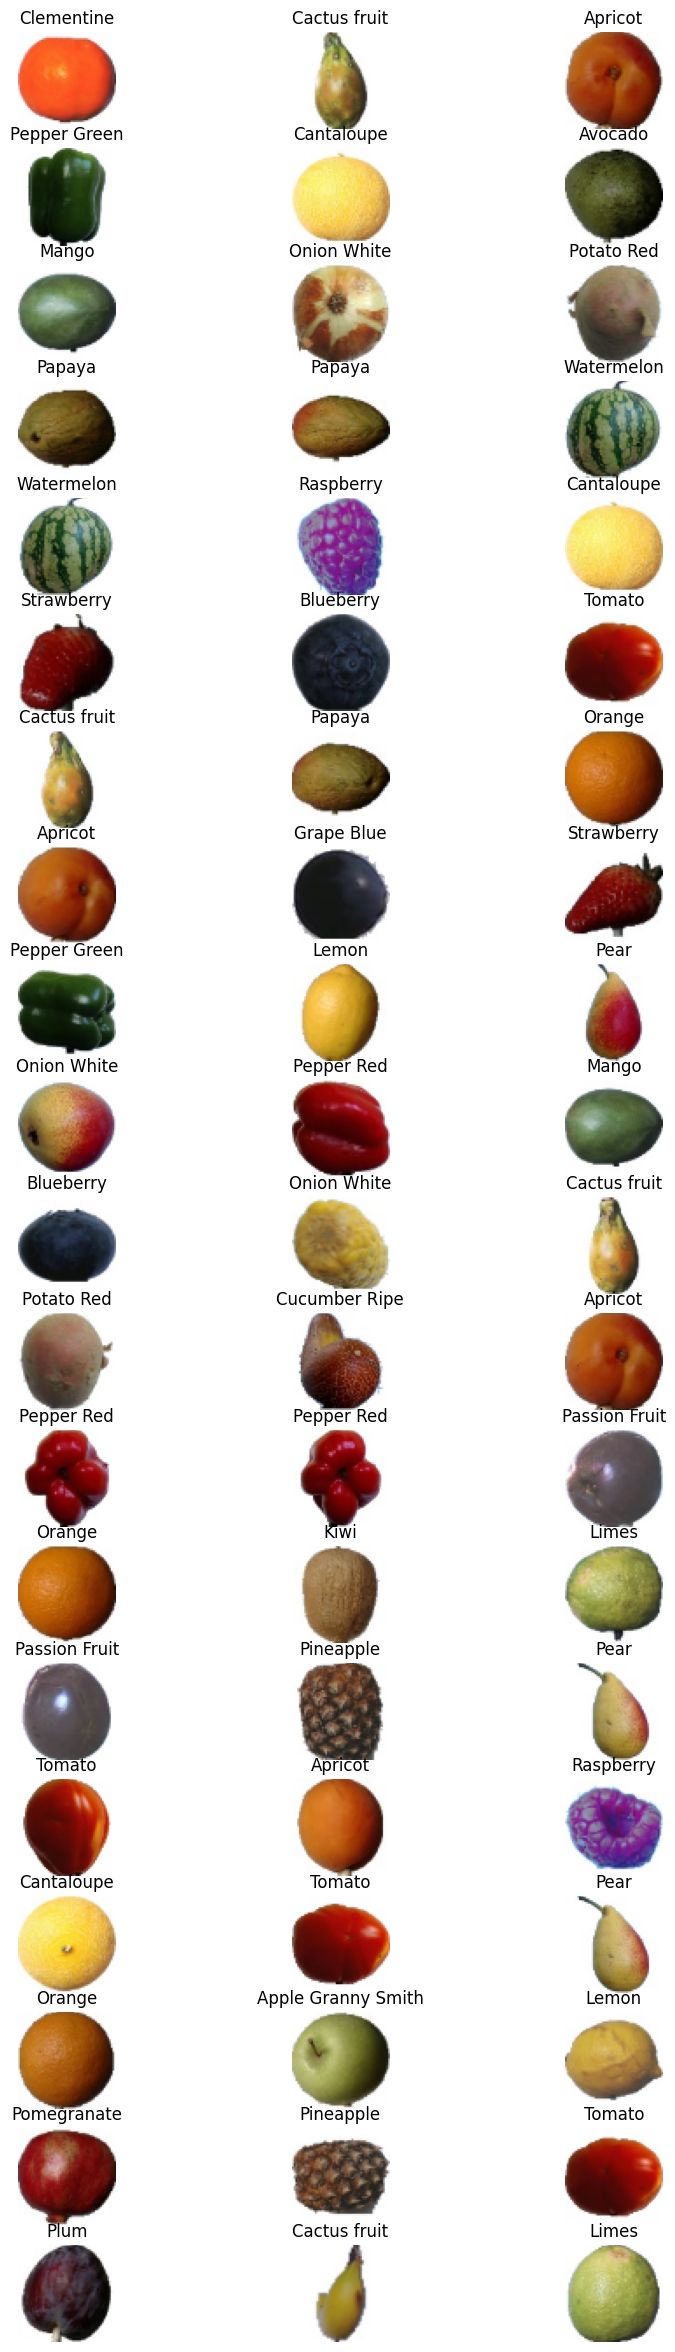

In [14]:
#visualize results
import random


#predict
predictions = model.predict(converted_test)
preds = []
labels = {value:key for key, value in label_nums.items()}
for i, pred in enumerate(predictions):
    preds.append(labels[pred.argmax()])


print(label_nums)
#plot random images
fig, ax = plt.subplots(20,3, figsize=(10,30))
for i in range(20):
    for j in range(3):
        rand = random.randint(0, len(converted_test))
        ax[i,j].imshow(converted_test[rand])
        ax[i,j].set_title(preds[rand])
        ax[i,j].axis("off")

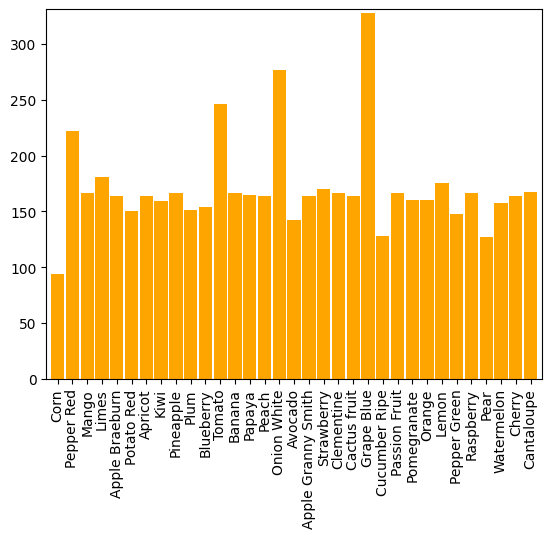

In [15]:
from collections import Counter
#count the number of each label
counter = dict(Counter(preds))
#plot the number of each label
plt.bar(counter.keys(), counter.values(), width=0.9, color="orange")
plt.xticks(rotation=90)
plt.margins(0.01)
plt.show()

In [4]:
#load model
model = tf.keras.models.load_model(save_path)

177/177 [==============================] - 6s 36ms/step
{'Apple Braeburn': 0, 'Apple Granny Smith': 1, 'Apricot': 2, 'Avocado': 3, 'Banana': 4, 'Blueberry': 5, 'Cactus fruit': 6, 'Cantaloupe': 7, 'Cherry': 8, 'Clementine': 9, 'Corn': 10, 'Cucumber Ripe': 11, 'Grape Blue': 12, 'Kiwi': 13, 'Lemon': 14, 'Limes': 15, 'Mango': 16, 'Onion White': 17, 'Orange': 18, 'Papaya': 19, 'Passion Fruit': 20, 'Peach': 21, 'Pear': 22, 'Pepper Green': 23, 'Pepper Red': 24, 'Pineapple': 25, 'Plum': 26, 'Pomegranate': 27, 'Potato Red': 28, 'Raspberry': 29, 'Strawberry': 30, 'Tomato': 31, 'Watermelon': 32}


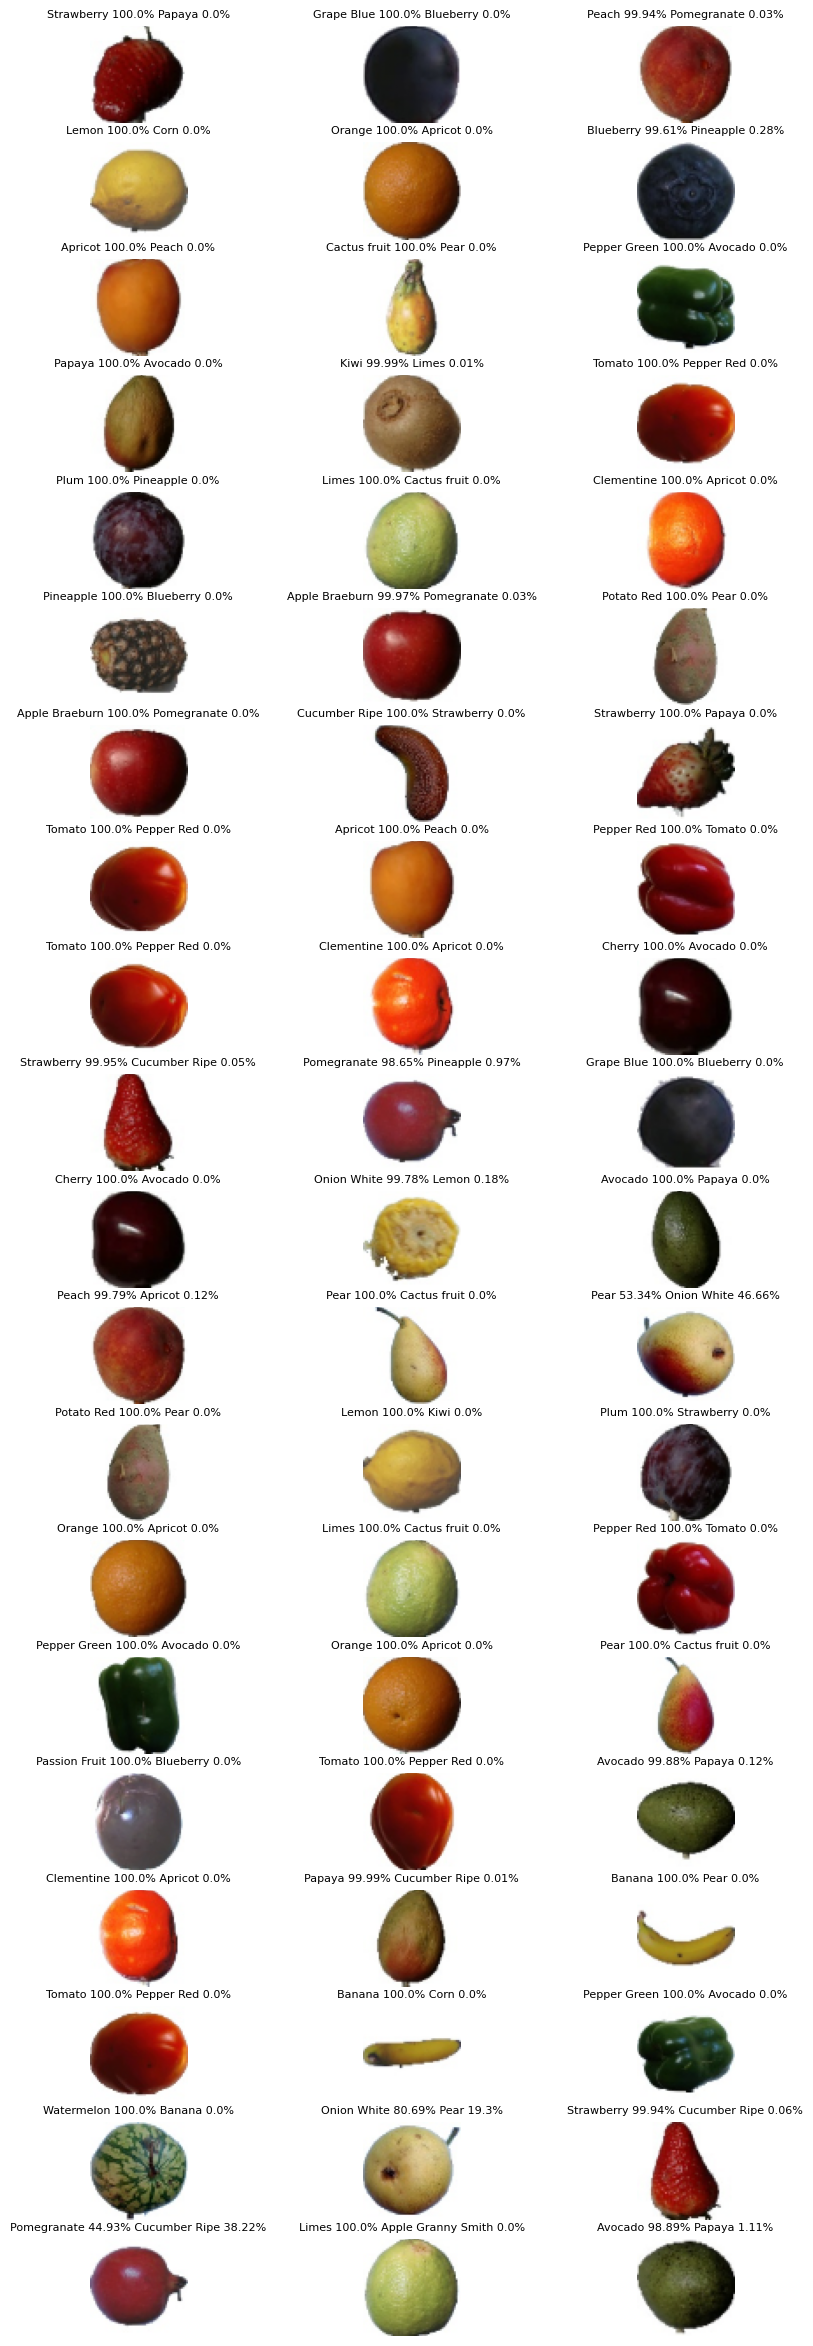

In [27]:
#visualize results with probability
import random
#predict
predictions = model.predict(converted_test)
preds = []
labels = {value:key for key, value in label_nums.items()}
for i, pred in enumerate(predictions):
    sorted_indices = np.argsort(pred)[::-1]  # Sort in descending order
    second_max_index = sorted_indices[1]  # Select the second element
    pred_label = labels[pred.argmax()]
    pred_prob = round(pred.max() * 100, 2)
    second_label = labels[second_max_index]
    second_prob = round(pred[second_max_index] * 100, 2)
    
    preds.append(f"{pred_label} {pred_prob}% {second_label} {second_prob}%")


print(label_nums)
#plot random images
fig, ax = plt.subplots(20,3, figsize=(10,30))
for i in range(20):
    for j in range(3):
        rand = random.randint(0, len(converted_test))
        ax[i,j].imshow(converted_test[rand])
        ax[i,j].set_title(preds[rand], fontsize=8)
        ax[i,j].axis("off")

1/1 [==============================] - 0s 40ms/step


(-0.5, 55.5, 55.5, -0.5)

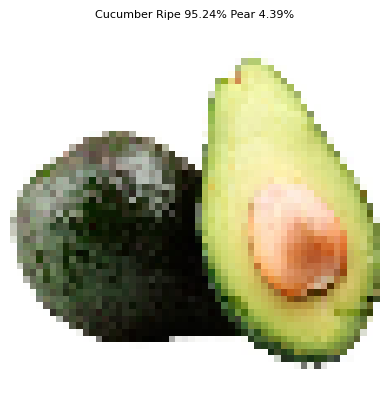

In [8]:
#predict images outside from dataset
path = "D:\Coding\DataScience\DataPlayground\FruitRecognition\data\outside\Avocados-3d84a3a.jpg"

image = img_to_array(path)

prediction = model.predict(np.array([image]))
preds = []
labels = {value:key for key, value in label_nums.items()}
for i, pred in enumerate(prediction):
    sorted_indices = np.argsort(pred)[::-1]  # Sort in descending order
    second_max_index = sorted_indices[1]  # Select the second element
    pred_label = labels[pred.argmax()]
    pred_prob = round(pred.max() * 100, 2)
    second_label = labels[second_max_index]
    second_prob = round(pred[second_max_index] * 100, 2)
    
    preds.append(f"{pred_label} {pred_prob}% {second_label} {second_prob}%")


plt.imshow(image)
plt.title(preds[0], fontsize=8)
plt.axis("off")
